<a href="https://colab.research.google.com/github/hooroobaby/NCUAICourse/blob/main/Maze_107403037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**作業3 : 利用RL逃離迷宮**

**說明:**

Using Q-learining or any reinforcement learning algorithm to find out the  way to escape the maze.

請利用Q-learning或任何你知道的RL方法去逃離迷宮

請隨意修改這個colab的程式來完成訓練

數字僅供繪製地圖時參考用

迷宮本身為21*11的迷宮

起點左上角(0,0) 終點為右下角(20,10)

X表示牆壁位置(顏色為綠色方便區分)
O表示寶藏位置(顏色為橘色方便區分)
S表示起點位置
G表示終點位置
黃色底色表示可能路徑

請利用以下程式碼將地圖設定完成

移動時不可穿過障礙物

**評分標準:**

心得(20%)

到達終點(40%)

拿取寶藏(25%)

抵達終點所消耗步數(15%)


**注意事項:**

訓練次數不得超過1000次

不會因為步數過多扣分 以能到終點為主要作業目標 步數越少分數越高

請自行將規則補在程式內

並制定良好的Reward讓你更快走完(老師上課說的，自行發揮)

寶藏計分方式為參數Score

每踩到一個寶箱Score+1 每場重置 每回合都必須計算Score分數 最高5分

**繳交格式:**

需繳交2個檔案

1.心得 (HW3_學號.pdf)

2.程式碼 (HW3_學號.ipynb)

*繳交時心得需要包含

**1.完整迷宮截圖**

**2.步數最少的截圖**

**3.訓練完的Q-table**

**4.score分數**

以上缺一不可 如少一以心得50%扣 缺二心得即為0分






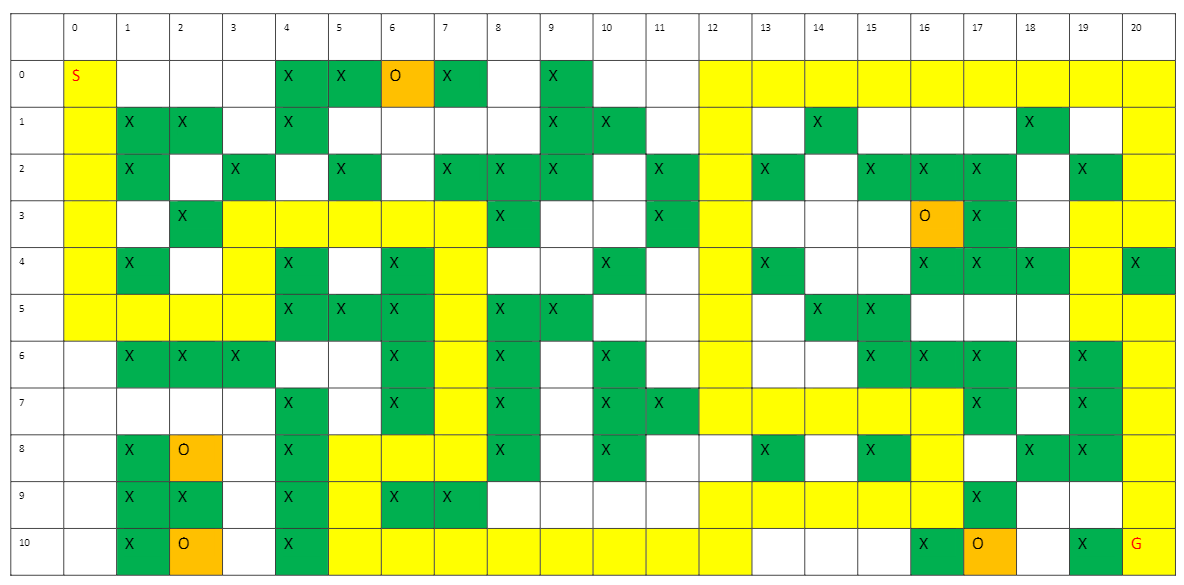

迷宮詳細資訊助教幫你寫好了

看你要用陣列寫還是數值計算

**牆壁**

陣列位置：

(0,4),(0,5),(0,7),(0,9),(1,1),(1,2),(1,4),(1,9),(1,10),(1,14),(1,18),(2,1),(2,3),(2,5),(2,7),(2,8),(2,9),(2,11),(2,13),(2,15),(2,16),(2,17),(2,19),(3,2),(3,8),(3,11),(3,17),(4,1),(4,4),(4,6),(4,10),(4,13),(4,16),(4,17),(4,18),(4,20),(5,4),(5,5),(5,6),(5,8),(5,9),(5,14),(5,15),(6,1),(6,2),(6,3),(6,6),(6,8),(6,10),(6,15),(6,16),(6,17),(6,19),(7,4),(7,6),(7,8),(7,10),(7,11),(7,17),(7,19),(8,1),(8,4),(8,8),(8,10),(8,13),(8,15),(8,18),(8,19),(9,1),(9,2),(9,4),(9,6),(9,7),(9,17),(10,1),(10,4),(10,16),(10,19)

數值：
4,5,7,9,21,22,24,29,30,34,38,41,43,45,47,48,49,51,53,55,56,57,59,62,68,71,77,81,84,86,90,93,96,97,98,100,104,105,106,108,109,114,115,121,122,123,126,128,130,135,136,137,139,144,146,148,150,151,157,159,161,164,168,170,173,175,178,179,181,182,184,186,187,197,201,204,216,219

**起點**

陣列位置 （0,0)

數值 0


**終點**

陣列位置 (20,10)

數值 210


**寶藏**

陣列位置 （0,6),(3,16),(8,2),(10,2),(10,17)

數值 6,76,162,202,217


以下程式碼是以40*30的空迷宮程式碼

請自行添加牆壁以及規則進行訓練

每個人的迷宮要漲一樣
牆壁：陣列或數值做出哪邊不能走

In [ ]:
import numpy as np
import pandas as pd
import time

設定x,y軸長度，

範例為40*30的無障礙迷宮

並設定可行動動作為上下左右

目標位置在最右下角

以及各項參數設定

SCORE為計算寶藏分數用

得分計算方法請自行補上

In [ ]:
N_STATES_x=21
N_STATES_y=11
ACTIONS=['left','right','up','down']
GOAL=230
SCORE=0
EPSILON=0.9
ALPHA=0.1 #可改可不改
GAMMA=0.9 #可改可不改
MAX_EPISODES=50
FRESH_TIME=0
O=[6,79,170,212,227] #寶藏位置
X=[4,5,7,9,22,23,25,30,31,35,39,43,45,47,49,50,51,53,55,57,58,59,61,65,71,74,80,85,88,90,94,97,100,101,102,104,109,110,111,113,114,119,120,127,128,129,132,134,136,141,142,143,145,151,153,155,157,158,164,166,169,172,176,178,181,183,186,187,190,191,193,195,196,206,211,214,226,229]


建立一開始的空Q table

In [ ]:
def build_q_table(N_STATES_x,N_STATES_y,actions):
    table = pd.DataFrame(np.zeros((N_STATES_x*N_STATES_y,len(actions))),columns=actions,)

    # 寶藏
    for i in range(len(O)):
      table.loc[O[i]-1]["right"]=2 #左邊
      table.loc[O[i]+1]["left"]=2 #右邊
      if O[i]>20:
        table.loc[O[i]-21]["down"]=2 #上面
      if O[i]<210:
        table.loc[O[i]+21]["up"]=2 #下面
    table.loc[0]["down"]=100
    for i in range(len(X)):
      table.loc[X[i]]=[-5,-5,-5,-5] #牆壁本身
      table.loc[X[i]-1]["right"]=-100 #牆壁左一格
      table.loc[X[i]+1]["left"]=-100 #牆壁右一格
      if X[i]<210:
        table.loc[X[i]+21]["up"]=-100 #牆壁下面一格
      if X[i]>20:
        table.loc[X[i]-21]["down"]=-100 #牆壁上面一格

    for i in range(21):
      table.loc[i]["up"]=-10 #最上面那一排，不能往上
      table.loc[210+i]["down"]=-10 #最下面那一排

    for i in range(11):
      table.loc[21*i]["left"]=-10 #最左
      table.loc[20+(21*i)]["right"]=-10 #最右

    return table
build_q_table(N_STATES_x,N_STATES_y,ACTIONS)

,left,right,up,down
0,-10.0,0.0,-10.0,100.0
1,0.0,0.0,-10.0,-100.0
2,0.0,0.0,-10.0,-100.0
3,0.0,-100.0,-10.0,0.0
4,-5.0,-100.0,-10.0,-100.0
...,...,...,...,...
226,-5.0,-5.0,-5.0,-10.0
227,-100.0,0.0,-100.0,-10.0
228,2.0,-100.0,0.0,-10.0
229,-5.0,-5.0,-5.0,-10.0


如何選擇動作

In [ ]:
def choose_action(state,q_table):
    state_actions=q_table.iloc[state,:]
    # if (np.random.uniform()>EPSILON) or ((state_actions==0).all()):
    if (state_actions==0).all():
        action_name=np.random.choice(ACTIONS)
    else:
        # action_name= state_actions.idxmax() # 從可能有多個的最大值裡面隨機選擇一個
        action_name= np.random.choice(state_actions[state_actions==state_actions.max()].index)
    return action_name
# choose_action(63,build_q_table(N_STATES_x,N_STATES_y,ACTIONS))

Reward設定

(以向右走為例 剩餘動作請自行補上)

In [ ]:
# 主要修改：上下左
def get_env_feedback(S,A,path):

    if A=='right':
        #代表目前在Goal左邊，往右一步就到了
        if S == GOAL - 1:
            S_ = "terminal"
            R = 20
        #最右邊那列，往右一步就出去了
        elif S % N_STATES_x == N_STATES_x - 1:
            S_ = S
            R = -5

        else: #其他符合規定的
            S_ = S + 1
            R = 3


    if A=='left':
        #不可能在Goal右邊，往左一步就到了
        #最左邊那列，往左一步就出去了
        if S % N_STATES_x == 0:
            S_ = S
            R = -5

        else:
            S_ = S - 1
            R = 3


    if A=='up':
        #不可能在Goal下面
        #最上邊那列，往上一步就出去了
        if 0<= S <= 20:
            S_ = S
            R = -5

        else:
            S_ = S - N_STATES_x
            R = 3


    if A=='down':
        #代表目前在Goal上邊，往下一步就到了
        if S == GOAL - N_STATES_x:
            S_ = "terminal"
            R = 15
        #最下邊那列，往下一步就出去了
        elif 210<= S <=230:
            S_ = S
            R = -5

        else:
            S_ = S+N_STATES_x
            R = 3

    if len(path)>2: #卡住
        if path[len(path)-1]==path[len(path)-3]:
          R=R-5

    for i in range(len(path)): #回頭路
        if S_ == path[i]:
            R=R-5

    for i in range(len(X)): #下一步圍牆
        if S_==X[i]:
            R=R-100

    for i in range(len(O)): #下一步寶藏
        if S_==O[i]:
            R=R+5



    return S_,R
#         if len(path)>2:
#             if path[len(path)-1]==path[len(path)-3]:
#                 A=np.random.choice(ACTIONS)

利用選擇的動作更新畫面
可自行選擇是否印出

In [ ]:
# 不用改，把地圖印出來
def update_env(S,episode,step_counter):
    env_map=[['-' for i in range(N_STATES_x)] for j in range(N_STATES_y)]
    env_map[int(GOAL/N_STATES_x)][GOAL%N_STATES_x] = 'T'
    result = []
    if S=='terminal':
        interaction='Episode %s: total_steps=%s' % (episode+1,step_counter)
        result.append(interaction)
        print(result)
        print('\r' ,end='')
    else:
        env_map[int(S/N_STATES_x)][int(S%N_STATES_x)] = 'o'
        #time.sleep(FRESH_TIME)
# update_env('terminal',0,22)

更新Q table

In [ ]:
# 不用改
def rl():
    q_table=build_q_table(N_STATES_x,N_STATES_y,ACTIONS) # 初始q_table
    for episode in range(MAX_EPISODES): # 回合
        SCORE=0
        step_counter = 0
        S = 0       #回合初始位置
        is_terminated = False # 是否到達終點(目標)
        path = []
        score = [False,False,False,False,False]
        update_env(S,episode,step_counter) # 環境更新
        while not is_terminated:
            A = choose_action(S,q_table) # 選行為(上下左右)
            path.append(S)
            S_, R = get_env_feedback(S,A,path) # 實施行為並得到環境的反饋
            q_predict = q_table.loc[S,A] # 估算的(狀態-行為)值
            if S_ != 'terminal': #回合還沒結束
                q_target = R+GAMMA*q_table.iloc[S_,:].max() #實際的(狀態-行為)值
            else: #已經走到終點
                q_target = R
                is_terminated=True
            # 修正q_table，"修正的幅度"：若預測的小於真實值，則上修，反之則下修，ALPHA又稱學習速率。
            q_table.loc[S,A] += ALPHA*(q_target-q_predict)
            #移動到下一個 state
            S = S_
            update_env(S,episode,step_counter+1) #環境更新
            step_counter += 1

            if S_==O[0]:
              score[0]=True
            elif S_==O[1]:
              score[1]=True
            elif S_==O[2]:
              score[2]=True
            elif S_==O[3]:
              score[3]=True
            elif S_==O[4]:
              score[4]=True

        for i in range(len(score)):
          if score[i]==True:
            SCORE=SCORE+1

        print("SCORE=",SCORE)
        print(path)
        print("---------------------------------------")
    return all,q_table

執行程式

In [ ]:
if __name__=="__main__":
    q_table = rl()
    print('\r\nQ-table:\n')
    print(q_table)

['Episode 1: total_steps=380']
SCORE= 3
[0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 0, 21, 42, 63, 42, 63, 64, 63, 84, 105, 106, 105, 106, 107, 86, 87, 108, 87, 108, 107, 86, 87, 86, 107, 86, 87, 66, 67, 46, 67, 46, 67, 66, 67, 68, 89, 68, 89, 68, 67, 68, 69, 70, 69, 70, 91, 92, 91, 92, 93, 92, 91, 70, 69, 48, 69, 48, 27, 6, 27, 6, 27, 6, 27, 6, 27, 48, 27, 28, 27, 26, 27, 26, 27, 28, 29, 8, 29, 8, 29, 28, 29, 8, 29, 28, 29, 8, 29, 28, 27, 6, 27, 28, 29, 8, 29, 28, 29, 8, 29, 28, 27, 26, 27, 48, 69, 68, 69, 48, 27, 6, 27, 26, 27, 48, 69, 70, 91, 112, 133, 112, 133, 154, 175, 174, 173, 152, 131, 152, 131, 130, 131, 152, 173, 152, 173, 174, 173, 194, 173, 194, 215, 194, 215, 216, 217, 216, 217, 218, 219, 218, 219, 220, 219, 198, 199, 198, 199, 200, 201, 200, 201, 202, 201, 180, 201, 222, 201, 200, 179, 180, 179, 200, 179, 180, 159, 180, 159, 138, 139, 140, 139, 140, 161, 160, 159, 160, 139, 118, 139, 118, 117, 138, 139, 138, 159, 160, 161, 160, 16

In [ ]:
# 最佳路徑path(Episode:50)
best=[0, 21, 42, 63, 84, 105, 106, 107, 108, 87, 66, 67, 68, 69, 70, 91, 112, 133, 154, 175, 174, 173, 194, 215, 216, 217, 218, 219, 220, 221, 222, 223, 202, 201, 180, 159, 160, 139, 138, 117, 96, 75, 54, 33, 34, 13, 14, 15, 36, 37, 38, 17, 18, 19, 40, 41, 62, 83, 82, 103, 124, 125, 146, 167, 188, 209]

maze = pd.DataFrame(np.zeros((N_STATES_y, N_STATES_x)))
maze[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]=" "
for i in range(len(X)):
  x=X[i]%21
  y=int(X[i]/21)
  maze[x][y]="X"
for i in range(len(O)):
  x=O[i]%21
  y=int(O[i]/21)
  maze[x][y]="V"
maze[0][0]="S"
maze[20][10]="G"
for i in range(len(best)):
  x=best[i]%21
  y=int(best[i]/21)
  maze[x][y]="▉"

maze

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,▉,,,,X,X,V,X,,X,,,,▉,▉,▉,,▉,▉,▉,
1,▉,X,X,,X,,,,,X,X,,▉,▉,X,▉,▉,▉,X,▉,▉
2,▉,X,,X,,X,,X,X,X,,X,▉,X,,X,X,X,,X,▉
3,▉,,X,▉,▉,▉,▉,▉,X,,,X,▉,,,,V,X,,▉,▉
4,▉,X,,▉,X,,X,▉,,,X,,▉,X,,,X,X,X,▉,X
5,▉,▉,▉,▉,X,X,X,▉,X,X,,,▉,,X,X,,,,▉,▉
6,,X,X,X,,,X,▉,X,,X,,▉,▉,,X,X,X,,X,▉
7,,,,,X,,X,▉,X,,X,X,▉,▉,,,,X,,X,▉
8,,X,V,,X,▉,▉,▉,X,,X,,▉,X,,X,,,X,X,▉
9,,X,X,,X,▉,X,X,,,,,▉,▉,,,,X,,,▉
